In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from IPython.core.display import display, HTML
plt.rcParams.update({'figure.max_open_warning': 0})
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', None)

# 1. Loading and cleaning the data

### Loading the data
The data was gathered by web scraping sale offers from otomoto.pl. It is the Poland's greatest internet car sale website.
This way, we can analyze 3500+ offers in order to get to know the market and be able to predict the car value based on features listed below

In [50]:
file_path = r"C:\Users\Kamil\OneDrive\Inżynieria danych i Data Science\BMW-3-market_analysis_and_price_prediction\data\BMW3_data.csv"

data = pd.read_csv(file_path)
data.head()

,Nazwa,Cena,Oferta od,Pokaż oferty z numerem VIN,Ma numer rejestracyjny,Marka pojazdu,Model pojazdu,Wersja,Generacja,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie Poza Miastem,Spalanie W Mieście,Typ nadwozia,Emisja CO2,Liczba drzwi,Liczba miejsc,Kolor,Rodzaj koloru,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Numer rejestracyjny pojazdu,Zarejestrowany w Polsce,Tuning,Stan,VIN,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Spalanie W Cyklu Mieszanym,Okres gwarancji producenta,lub do (przebieg km),Możliwość finansowania,Faktura VAT,Uszkodzony,VAT marża,Gwarancja dealerska (w cenie),Miesięczna rata,Opłata początkowa,Liczba pozostałych rat,Wartość wykupu,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Autonomia
0,BMW Seria 3 330d,21 900,Prywatne,Tak,Tak,BMW,Seria 3,330d,E46 (1998-2007),2003,436 000 km,2 993 cm3,Diesel,204 KM,Manualna,Na tylne koła,5.0 l/100km,9 l/100km,Sedan,177 g/km,4.0,5.0,Czarny,Metalik,Szwajcaria,06 czerwiec 2003,WL7585R,Tak,Tak,Używane,Wyświetl VIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW Seria 3 328i Sport Line,77 600,Prywatne,Tak,Tak,BMW,Seria 3,328i Sport Line,F30/F31 (2012-2020),2016,92 000 km,1 997 cm3,Benzyna,245 KM,Automatyczna,4x4 (stały),NaN,"8,30 l/100km",Sedan,NaN,4.0,NaN,Granatowy,Metalik,Stany Zjednoczone,styczeń 2016,SZO5EC5,Tak,NaN,Używane,Wyświetl VIN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW Seria 3 320d xDrive Luxury Line,29 999,Prywatne,Tak,Tak,BMW,Seria 3,320d xDrive Luxury Line,E90/E91/E92/E93 (2005-2012),2012,288 000 km,1 995 cm3,Diesel,184 KM,Manualna,4x4 (stały),4.0 l/100km,6 l/100km,Kombi,129 g/km,5.0,5.0,Czarny,Perłowy,Austria,09 styczeń 2012,KN5472H,Tak,NaN,Używane,Wyświetl VIN,Tak,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW Seria 3 330d Touring M Sport,69 900,Prywatne,Tak,NaN,BMW,Seria 3,330d Touring M Sport,F30/F31 (2012-2020),2013,189 800 km,2 993 cm3,Diesel,258 KM,Automatyczna,Na tylne koła,NaN,"6,70 l/100km",Kombi,NaN,5.0,NaN,Inny kolor,NaN,NaN,NaN,NaN,NaN,NaN,Używane,Wyświetl VIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW Seria 3,58 500,Prywatne,Tak,Tak,BMW,Seria 3,NaN,E90/E91/E92/E93 (2005-2012),2010,209 000 km,2 996 cm3,Benzyna,218 KM,Automatyczna,Na tylne koła,NaN,NaN,Sedan,NaN,4.0,NaN,Szary,NaN,Szwajcaria,NaN,NaN,Tak,NaN,Używane,Wyświetl VIN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are a lot of problems with the data:
* Columns that don't add information - they were website's technical values
* Columns that have distinct value for every data point (car registration number)
* Columns that are directly tied to other columns
* Missing values
* Units in numeric values

In [51]:
columns_to_check = list(data.columns)

for column in columns_to_check:
    if len(data[column].unique()) <= 10:
        print("Wartości " + column + " " + str(data[column].unique()))

Wartości Oferta od ['Prywatne' 'Firma']
Wartości Pokaż oferty z numerem VIN ['Tak' nan]
Wartości Ma numer rejestracyjny ['Tak' nan]
Wartości Marka pojazdu ['BMW']
Wartości Model pojazdu ['Seria 3']
Wartości Generacja ['E46 (1998-2007)' 'F30/F31 (2012-2020)' 'E90/E91/E92/E93 (2005-2012)'
 'G20/G21 (2019-)' 'E36 (1990-1999)' nan 'E30 (1982-1994)'
 'E21 (1975-1982)']
Wartości Rodzaj paliwa ['Diesel' 'Benzyna' 'Benzyna+LPG' 'Hybryda']
Wartości Skrzynia biegów ['Manualna' 'Automatyczna']
Wartości Napęd ['Na tylne koła' '4x4 (stały)' '4x4 (dołączany automatycznie)' nan
 'Na przednie koła' '4x4 (dołączany ręcznie)']
Wartości Typ nadwozia ['Sedan' 'Kombi' 'Coupe' 'Kompakt' 'Auta małe' 'Kabriolet' 'Auta miejskie'
 'Minivan' 'SUV']
Wartości Liczba drzwi [ 4.  5.  2.  3. nan  6.]
Wartości Liczba miejsc [ 5. nan  4.  3.  2.  9.  1.]
Wartości Rodzaj koloru ['Metalik' 'Perłowy' nan 'Matowy']
Wartości Zarejestrowany w Polsce ['Tak' nan]
Wartości Tuning ['Tak' nan]
Wartości Stan ['Używane' 'Nowe']
War

We can drop the columns with single value, as they don't add any information.

Liczba drzwi (Number of doors) has some wrong informations - BMW 3 is only produced in 3 and 5 door versions. We can map 4, 6 and nan to 5 (as it is 5 by default) and 2 to 3 - it was probably marked by people who don't know that the trunk door are also counted.

Liczba miejsc (number of seats) can be dropped as BMW 3 is only manufactured as 5 seaters and all the other values must be mistakes or bizzare modifications.

In [52]:
# Droping unhelpful columns
# These are columns that don't bring any meaning for analysis - some of them have the same or distinct values for every data point.
data = data.drop(['Marka pojazdu', 'Model pojazdu', 'Pokaż oferty z numerem VIN', 'Liczba miejsc', 
                  'VIN', 'Numer rejestracyjny pojazdu', 'Rodzaj koloru'], axis=1)

In [53]:
# Correcting the data

# Fixing the door versions
data['Liczba drzwi'] = data['Liczba drzwi'].fillna(5)
data['Liczba drzwi'] = data['Liczba drzwi'].replace([4, 6], 5)
data['Liczba drzwi'] = data['Liczba drzwi'].replace(2, 3)


# Changing "Tak" to 1 and NaN to 0.
yes_fields = ['Ma numer rejestracyjny', 'Zarejestrowany w Polsce', 'Tuning', 'Bezwypadkowy', 'Serwisowany w ASO', 'Leasing',
              ' Pierwszy właściciel (od nowości)', 'Możliwość finansowania', 'Faktura VAT', 'Uszkodzony', 
              'Gwarancja dealerska (w cenie)']
data[yes_fields] = data[yes_fields].fillna(0)
data[yes_fields] = data[yes_fields].replace('Tak', 1)
data['Okres gwarancji producenta'] = data['Okres gwarancji producenta'].fillna(0)



In [54]:
data.head()

,Nazwa,Cena,Oferta od,Ma numer rejestracyjny,Wersja,Generacja,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie Poza Miastem,Spalanie W Mieście,Typ nadwozia,Emisja CO2,Liczba drzwi,Kolor,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Spalanie W Cyklu Mieszanym,Okres gwarancji producenta,lub do (przebieg km),Możliwość finansowania,Faktura VAT,Uszkodzony,VAT marża,Gwarancja dealerska (w cenie),Miesięczna rata,Opłata początkowa,Liczba pozostałych rat,Wartość wykupu,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Autonomia
0,BMW Seria 3 330d,21 900,Prywatne,1,330d,E46 (1998-2007),2003,436 000 km,2 993 cm3,Diesel,204 KM,Manualna,Na tylne koła,5.0 l/100km,9 l/100km,Sedan,177 g/km,5.0,Czarny,Szwajcaria,06 czerwiec 2003,1,1,Używane,0,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW Seria 3 328i Sport Line,77 600,Prywatne,1,328i Sport Line,F30/F31 (2012-2020),2016,92 000 km,1 997 cm3,Benzyna,245 KM,Automatyczna,4x4 (stały),NaN,"8,30 l/100km",Sedan,NaN,5.0,Granatowy,Stany Zjednoczone,styczeń 2016,1,0,Używane,1,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW Seria 3 320d xDrive Luxury Line,29 999,Prywatne,1,320d xDrive Luxury Line,E90/E91/E92/E93 (2005-2012),2012,288 000 km,1 995 cm3,Diesel,184 KM,Manualna,4x4 (stały),4.0 l/100km,6 l/100km,Kombi,129 g/km,5.0,Czarny,Austria,09 styczeń 2012,1,0,Używane,1,1,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW Seria 3 330d Touring M Sport,69 900,Prywatne,0,330d Touring M Sport,F30/F31 (2012-2020),2013,189 800 km,2 993 cm3,Diesel,258 KM,Automatyczna,Na tylne koła,NaN,"6,70 l/100km",Kombi,NaN,5.0,Inny kolor,NaN,NaN,0,0,Używane,0,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW Seria 3,58 500,Prywatne,1,NaN,E90/E91/E92/E93 (2005-2012),2010,209 000 km,2 996 cm3,Benzyna,218 KM,Automatyczna,Na tylne koła,NaN,NaN,Sedan,NaN,5.0,Szary,Szwajcaria,NaN,1,0,Używane,1,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some data are directly connected to features like Rodzaj paliwa Rok produkcji (Year of manufacturing), (Fuel type), Moc(Power), Typ nadwozia (body type). These are:
* Nazwa (Name)
* Wersja (Version)
* Generation (Generacja)
* Pojemoność skokowa (Engine volume)
* Spalanie (Fuel consumption) - all the columns
* Emisja CO2 (CO2 emission)
* Data pierwszej rejestracji (Date of registration)

These columns can be dropped to simplify the model

In [55]:
data = data.drop(['Nazwa', 'Wersja', 'Generacja', 'Pojemność skokowa', 'Spalanie Poza Miastem', 'Spalanie W Mieście', 
       'Emisja CO2', 'Data pierwszej rejestracji w historii pojazdu','Spalanie W Cyklu Mieszanym'], axis=1)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cena                               3518 non-null   object 
 1   Oferta od                          3518 non-null   object 
 2   Ma numer rejestracyjny             3518 non-null   int64  
 3   Rok produkcji                      3518 non-null   int64  
 4   Przebieg                           3511 non-null   object 
 5   Rodzaj paliwa                      3518 non-null   object 
 6   Moc                                3518 non-null   object 
 7   Skrzynia biegów                    3518 non-null   object 
 8   Napęd                              3048 non-null   object 
 9   Typ nadwozia                       3518 non-null   object 
 10  Liczba drzwi                       3518 non-null   float64
 11  Kolor                              3518 non-null   objec

In [57]:
# Droping the offers of leasing (not sale)
data = data[data['Liczba pozostałych rat'].isnull()]

In [58]:
# Droping the columns that are have not enough values to be significant
data = data.drop(['lub do (przebieg km)', 'VAT marża', 'Miesięczna rata', 'Opłata początkowa', 'Liczba pozostałych rat', 
       'Zarejestrowany jako zabytek', 'Wartość wykupu', 'Autonomia', 'Kierownica po prawej (Anglik)'], axis=1)

In [59]:
data.groupby(['Napęd'])['Napęd'].count()

Napęd
4x4 (dołączany automatycznie)     276
4x4 (dołączany ręcznie)             3
4x4 (stały)                       540
Na przednie koła                   30
Na tylne koła                    2187
Name: Napęd, dtype: int64

In [60]:
# Setting the unknown Kraj pochodzenia (country of origin) to unknown
data['Kraj pochodzenia'] = data['Kraj pochodzenia'].fillna('Nieznany')

# Setting the unknown Napęd (type of drive) to Na tylne koła (rear wheels) as it is the most popular
data['Napęd'] = data['Napęd'].fillna('Na tylne koła')

In [61]:
# droping data with unknown Przebieg (Mileage) as there is not many rows and it is a very useful column
data = data.dropna()

In [62]:
data.head()

,Cena,Oferta od,Ma numer rejestracyjny,Rok produkcji,Przebieg,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ nadwozia,Liczba drzwi,Kolor,Kraj pochodzenia,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Okres gwarancji producenta,Możliwość finansowania,Faktura VAT,Uszkodzony,Gwarancja dealerska (w cenie)
0,21 900,Prywatne,1,2003,436 000 km,Diesel,204 KM,Manualna,Na tylne koła,Sedan,5.0,Czarny,Szwajcaria,1,1,Używane,0,0,0,0,0,0,0,0,0
1,77 600,Prywatne,1,2016,92 000 km,Benzyna,245 KM,Automatyczna,4x4 (stały),Sedan,5.0,Granatowy,Stany Zjednoczone,1,0,Używane,1,0,0,0,0,0,0,0,0
2,29 999,Prywatne,1,2012,288 000 km,Diesel,184 KM,Manualna,4x4 (stały),Kombi,5.0,Czarny,Austria,1,0,Używane,1,1,0,0,0,0,0,0,0
3,69 900,Prywatne,0,2013,189 800 km,Diesel,258 KM,Automatyczna,Na tylne koła,Kombi,5.0,Inny kolor,Nieznany,0,0,Używane,0,0,0,0,0,0,0,0,0
4,58 500,Prywatne,1,2010,209 000 km,Benzyna,218 KM,Automatyczna,Na tylne koła,Sedan,5.0,Szary,Szwajcaria,1,0,Używane,1,0,0,0,0,0,0,0,0


In [63]:
# cleaning numeric data
data["Cena"] = pd.to_numeric(data["Cena"].str.replace(" ",""))
data["Moc"] = pd.to_numeric(data["Moc"].str.replace(" KM",""))
data["Przebieg"] = pd.to_numeric(data["Przebieg"].str.replace(" ","").str.replace("km",""))
data["Liczba drzwi"] = data["Liczba drzwi"].astype(int)

### Handling the date types

In [69]:
columns_to_check = ['Okres gwarancji producenta', 'Gwarancja dealerska (w cenie)']

for column in columns_to_check:
    print("Wartości " + column + " " + str(data[column].unique()))

Wartości Okres gwarancji producenta [0 '4 Stycznia 2026' '4 Sierpnia 2024' '24 Lutego 2024' '1 Stycznia 2027'
 '1 Lipca 2024' '6 Czerwca 2026' '14 Kwietnia 2024' '30 Czerwca 2026'
 '1 Marca 2025' '29 Kwietnia 2024' '20 Maja 2024' '15 Kwietnia 2026'
 '26 Stycznia 2023' '28 Marca 2028' '15 Lutego 2024' '1 Marca 2024'
 '1 Stycznia 2030' '4 Sierpnia 2027' '5 Maja 2024' '23 Grudnia 2023'
 '31 Lipca 2024' '8 Marca 2024' '1 Stycznia 2029' '16 Marca 2024'
 '26 Października 2024' '29 Kwietnia 2026' '19 Marca 2026'
 '8 Sierpnia 2024' '15 Grudnia 2025' '3 Listopada 2026' '26 Lutego 2025'
 '21 Grudnia 2025' '25 Maja 2026' '22 Czerwca 2024' '12 Kwietnia 2024'
 '19 Sierpnia 2025' '10 Lutego 2024' '19 Marca 2024' '15 Lutego 2025'
 '30 Marca 2027' '17 Marca 2026' '2 Sierpnia 2024' '23 Maja 2024'
 '13 Lipca 2025' '29 Maja 2024' '30 Czerwca 2025' '30 Czerwca 2024'
 '22 Września 2024' '4 Maja 2024' '10 Marca 2025' '23 Marca 2024'
 '29 Lutego 2024' '9 Sierpnia 2024' '7 Listopada 2025' '24 Marca 2025'
 '28

In [64]:
data.head()

,Cena,Oferta od,Ma numer rejestracyjny,Rok produkcji,Przebieg,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ nadwozia,Liczba drzwi,Kolor,Kraj pochodzenia,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Okres gwarancji producenta,Możliwość finansowania,Faktura VAT,Uszkodzony,Gwarancja dealerska (w cenie)
0,21900,Prywatne,1,2003,436000,Diesel,204,Manualna,Na tylne koła,Sedan,5,Czarny,Szwajcaria,1,1,Używane,0,0,0,0,0,0,0,0,0
1,77600,Prywatne,1,2016,92000,Benzyna,245,Automatyczna,4x4 (stały),Sedan,5,Granatowy,Stany Zjednoczone,1,0,Używane,1,0,0,0,0,0,0,0,0
2,29999,Prywatne,1,2012,288000,Diesel,184,Manualna,4x4 (stały),Kombi,5,Czarny,Austria,1,0,Używane,1,1,0,0,0,0,0,0,0
3,69900,Prywatne,0,2013,189800,Diesel,258,Automatyczna,Na tylne koła,Kombi,5,Inny kolor,Nieznany,0,0,Używane,0,0,0,0,0,0,0,0,0
4,58500,Prywatne,1,2010,209000,Benzyna,218,Automatyczna,Na tylne koła,Sedan,5,Szary,Szwajcaria,1,0,Używane,1,0,0,0,0,0,0,0,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 3517
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Cena                               3498 non-null   int64 
 1   Oferta od                          3498 non-null   object
 2   Ma numer rejestracyjny             3498 non-null   int64 
 3   Rok produkcji                      3498 non-null   int64 
 4   Przebieg                           3498 non-null   int64 
 5   Rodzaj paliwa                      3498 non-null   object
 6   Moc                                3498 non-null   int64 
 7   Skrzynia biegów                    3498 non-null   object
 8   Napęd                              3498 non-null   object
 9   Typ nadwozia                       3498 non-null   object
 10  Liczba drzwi                       3498 non-null   int32 
 11  Kolor                              3498 non-null   object
 12  Kraj p

# Exploratory data analysis

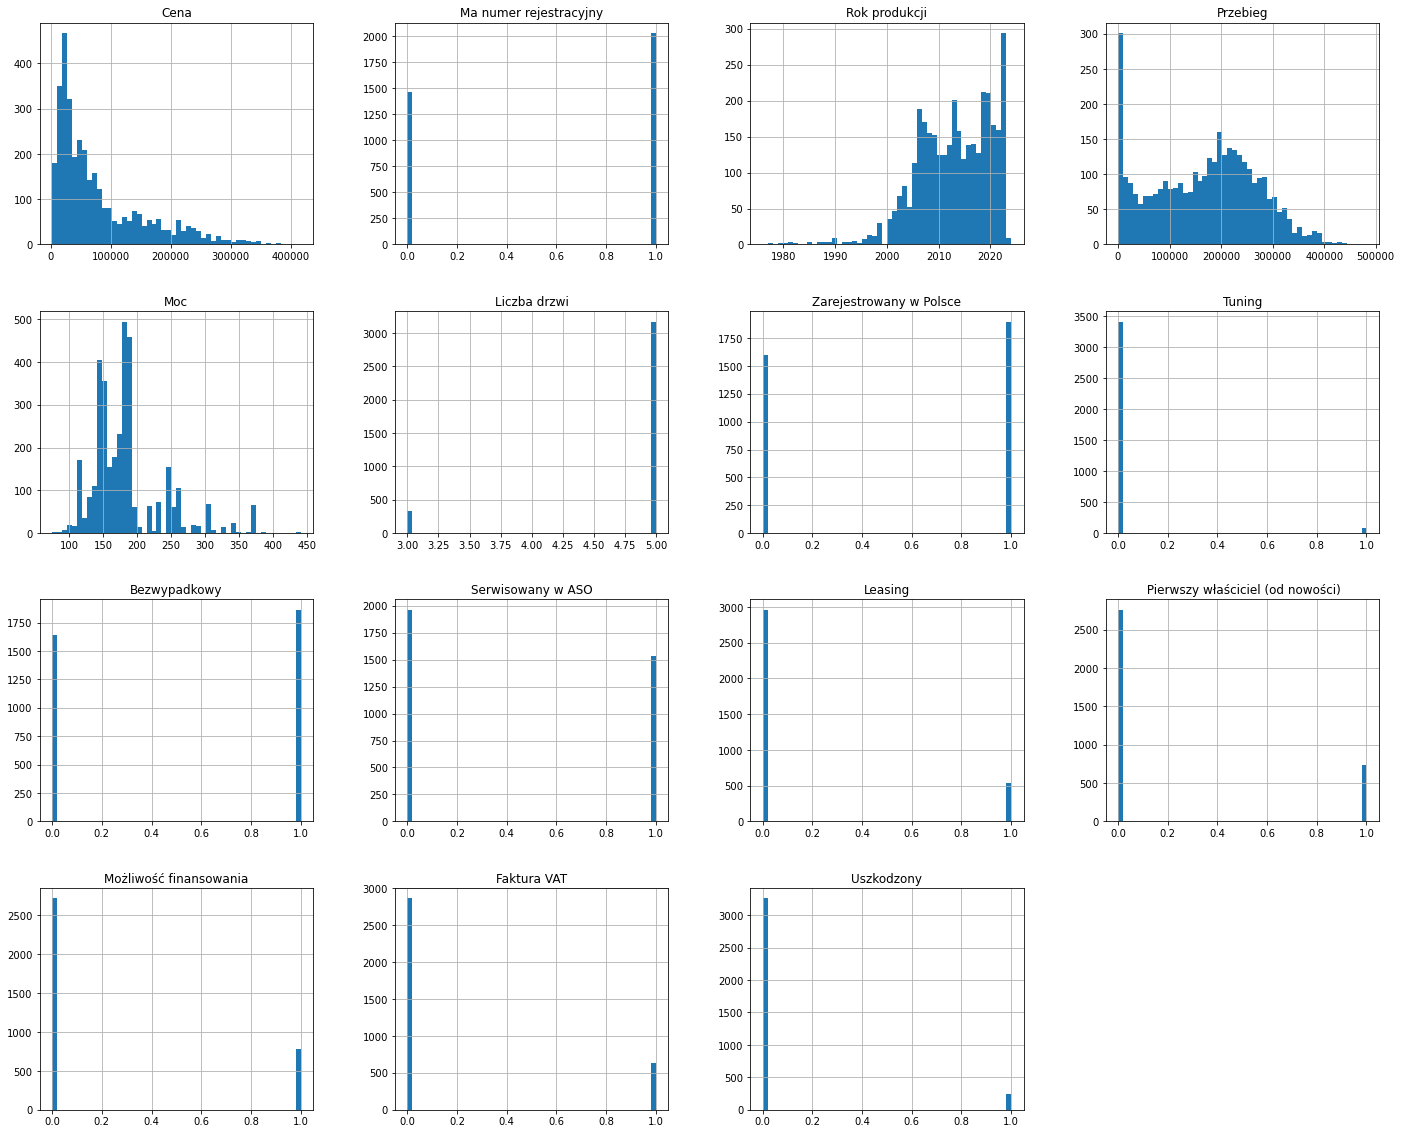

In [66]:
data_numeric = data.select_dtypes(include=np.number)

data_numeric.hist(bins=50, figsize=(24,20))
plt.show()

In [67]:
data_categoric = data.select_dtypes(include='object')
data_categoric


,Oferta od,Rodzaj paliwa,Skrzynia biegów,Napęd,Typ nadwozia,Kolor,Kraj pochodzenia,Stan,Okres gwarancji producenta,Gwarancja dealerska (w cenie)
0,Prywatne,Diesel,Manualna,Na tylne koła,Sedan,Czarny,Szwajcaria,Używane,0,0
1,Prywatne,Benzyna,Automatyczna,4x4 (stały),Sedan,Granatowy,Stany Zjednoczone,Używane,0,0
2,Prywatne,Diesel,Manualna,4x4 (stały),Kombi,Czarny,Austria,Używane,0,0
3,Prywatne,Diesel,Automatyczna,Na tylne koła,Kombi,Inny kolor,Nieznany,Używane,0,0
4,Prywatne,Benzyna,Automatyczna,Na tylne koła,Sedan,Szary,Szwajcaria,Używane,0,0
...,...,...,...,...,...,...,...,...,...,...
3513,Prywatne,Diesel,Automatyczna,Na tylne koła,Sedan,Czarny,Nieznany,Używane,0,0
3514,Prywatne,Diesel,Manualna,Na tylne koła,Sedan,Szary,Luksemburg,Używane,0,0
3515,Prywatne,Diesel,Manualna,Na tylne koła,Coupe,Czarny,Polska,Używane,0,0
3516,Prywatne,Diesel,Automatyczna,Na tylne koła,Kombi,Srebrny,Niemcy,Używane,0,0
